# Etiquetado de las erróneas combinaciones de Curva y de Cola.

Importamos librerías.

In [1]:
import pandas as pd
import glob
import re

Leemos archivos csv.

Recorremos todo el directorio, englobamos los nombres de cada archivo en una lista, y luego los concatenamos por filas.

In [2]:
archivos = glob.glob("../Datasets/Dataset_0/*.csv")

lista = []

for archivo in archivos:
    df = pd.read_csv(archivo, sep=";", header=0)
    lista.append(df)

df = pd.concat(lista, axis=0, ignore_index=True)

df.head(2)

,fecha,FormacionNIRHumedadPV,FibraticPredNIRHumedadPV,Hum_Pred,Etapa2MWHumedadPV,ExtractorVelocidadPV,FormacionAlturaMantaPV,FormadoraVelocidadPV,FormadoraSiloNivel,SiloFibraNivel,...,SierrasAnchoPV,ScalperPosPV,ScalperReservaMediaPV,ScalperReservaDerPosPV,ScalperReservaIzqPosPV,FormacionNIRPH,ComisionActualProductoCodigo,ComisionActualNetoEspesor,FormacionNIRCurva,ColaTipo
0,2021-02-01 00:00:54.884 UTC,9.49,NaN,11.1079,14.48314,67.98827,81.78497,58.2,29.99925,39.99929,...,2238.53,225.4,61.69483,61.69483,61.69483,4.94,FPANHID,1000,FR-2130+BU-3009,fr 2130
1,2021-02-01 00:00:54.884 UTC,9.49,NaN,11.1079,14.48314,67.98827,81.78497,58.2,29.99925,39.99929,...,2238.53,225.4,61.69483,61.69483,61.69483,4.94,FPANHID,1000,FR-2130+BU-3009,fr 2130


Mapeamos la columna 'Negro' con 1 si aparece la subcadena 'FCN' en la columna 'ComisionActualProductoCodigo', sino con 0.

In [3]:
df['Negro'] = df['ComisionActualProductoCodigo'].map(lambda x: 1 if ('FCN' in str(x)) else 0)

Leemos el archivo con las buenas combinaciones de curva y de cola.

In [4]:
combinacionescc = pd.read_csv('../Datos/CombinacionesCurvaColaOK.csv')
combinacionescc

,FormacionNIRCurva,ColaTipo
0,FR-2116+BU-300,fr 2116
1,FR-2116+BU-300,res 2116
2,FR-2130+BU-3009,fr 2130
3,FR-2130+BU-3009,2290
4,FR-2130+BU-3009,fr-2061
5,FR-2116+BU3009,fr 2116
6,FR1350+BU300,fr-1350
7,FR1350+BU3009,fr-1350
8,FR2130+BU300,fr 2130
9,FR2130+BU300,fr-2061


Eliminamos el texto delante de las colas que tienen carácteres numéricos para la comparación, debido a que a veces el string aparece distinto. Aplico la tarea tanto en el dataframe de datos como en el dataframe de combinaciones de curva y cola.

In [5]:
df['ColaTipo'] = df['ColaTipo'].astype(str).map(lambda x: re.findall(r'\d+', x) if any(i.isdigit() for i in x)==True else x)
df['ColaTipo'] = df['ColaTipo'].map(lambda x: x[0] if any(i.isdigit() for i in x)==True else x)

combinacionescc['ColaTipo'] = combinacionescc['ColaTipo'].astype(str).map(lambda x: re.findall(r'\d+', x) if any(i.isdigit() for i in x)==True else x)
combinacionescc['ColaTipo'] = combinacionescc['ColaTipo'].map(lambda x: x[0] if any(i.isdigit() for i in x)==True else x)

df.head(2)

,fecha,FormacionNIRHumedadPV,FibraticPredNIRHumedadPV,Hum_Pred,Etapa2MWHumedadPV,ExtractorVelocidadPV,FormacionAlturaMantaPV,FormadoraVelocidadPV,FormadoraSiloNivel,SiloFibraNivel,...,ScalperPosPV,ScalperReservaMediaPV,ScalperReservaDerPosPV,ScalperReservaIzqPosPV,FormacionNIRPH,ComisionActualProductoCodigo,ComisionActualNetoEspesor,FormacionNIRCurva,ColaTipo,Negro
0,2021-02-01 00:00:54.884 UTC,9.49,NaN,11.1079,14.48314,67.98827,81.78497,58.2,29.99925,39.99929,...,225.4,61.69483,61.69483,61.69483,4.94,FPANHID,1000,FR-2130+BU-3009,2130,0
1,2021-02-01 00:00:54.884 UTC,9.49,NaN,11.1079,14.48314,67.98827,81.78497,58.2,29.99925,39.99929,...,225.4,61.69483,61.69483,61.69483,4.94,FPANHID,1000,FR-2130+BU-3009,2130,0


Concateno los strings de curva y cola en los dos df's. Después comparo las cadenas de los dos df's para discriminar en 0 (buena combinación) y 1 (mala combinación, error). Además, elimino las columnsa FormacionNIRCurva y ColaTipo por no resultar de interés en adelante.

In [6]:
df['CurvaCola'] = df['FormacionNIRCurva'] + '-' + df['ColaTipo']
combinacionescc['CurvaCola'] = combinacionescc['FormacionNIRCurva'] + '-' + combinacionescc['ColaTipo']
df['CurvaCola'] = df['CurvaCola'].map(lambda x: 0 if x in combinacionescc['CurvaCola'].to_list() else 1)

df = df.drop(['FormacionNIRCurva','ColaTipo'],axis=1)
df.head(2)

,fecha,FormacionNIRHumedadPV,FibraticPredNIRHumedadPV,Hum_Pred,Etapa2MWHumedadPV,ExtractorVelocidadPV,FormacionAlturaMantaPV,FormadoraVelocidadPV,FormadoraSiloNivel,SiloFibraNivel,...,SierrasAnchoPV,ScalperPosPV,ScalperReservaMediaPV,ScalperReservaDerPosPV,ScalperReservaIzqPosPV,FormacionNIRPH,ComisionActualProductoCodigo,ComisionActualNetoEspesor,Negro,CurvaCola
0,2021-02-01 00:00:54.884 UTC,9.49,NaN,11.1079,14.48314,67.98827,81.78497,58.2,29.99925,39.99929,...,2238.53,225.4,61.69483,61.69483,61.69483,4.94,FPANHID,1000,0,0
1,2021-02-01 00:00:54.884 UTC,9.49,NaN,11.1079,14.48314,67.98827,81.78497,58.2,29.99925,39.99929,...,2238.53,225.4,61.69483,61.69483,61.69483,4.94,FPANHID,1000,0,0


# Agregación del Dataset a nivel de minuto

Establecemos el índice como datetime para la agregación (cortamos el string en los minutos, ya que lo que viene después es irrelevante, sino el proceso tarda demasiado).

In [7]:
df['fecha'] = df['fecha'].map(lambda x: x[0:16])
df['fecha']=pd.to_datetime(df['fecha'])

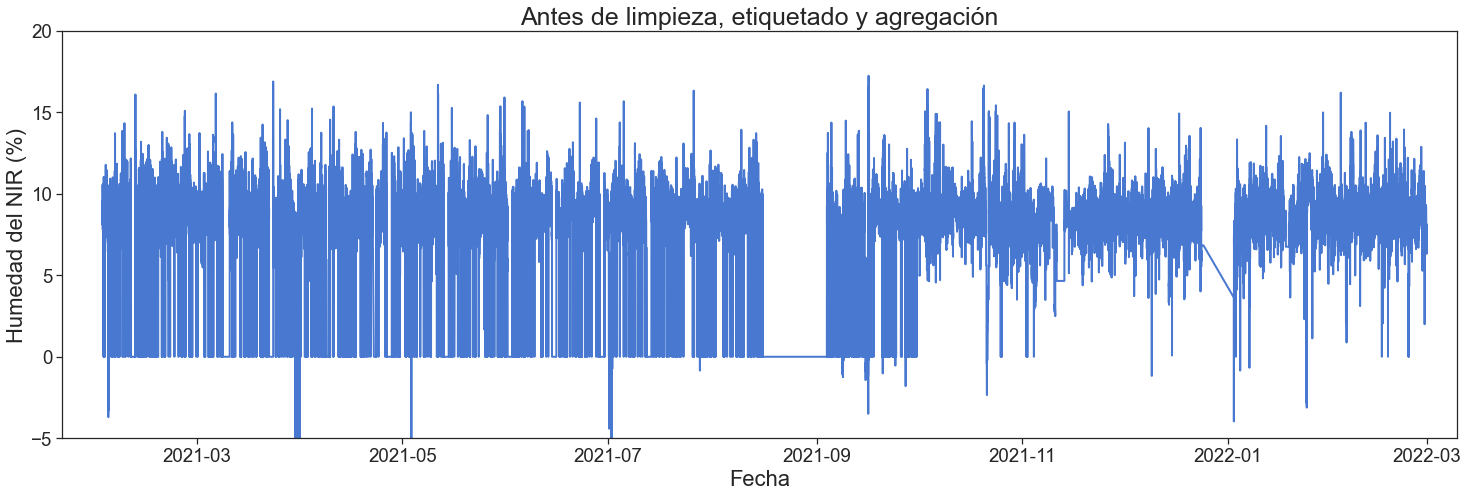

In [9]:
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
df = df.sort_values('fecha')
sns.set(style='ticks', font_scale=1.7, palette = "muted", rc={"font.size":10,"axes.titlesize":25,"axes.labelsize":22, "lines.linewidth": 2})
fig = plt.figure(figsize=(25,7.5))
plt.plot(df['fecha'],df.FormacionNIRHumedadPV)
plt.ylim(bottom=-5, top=20)
plt.xlim(dt.date(2021,1,20),dt.date(2022,3,10))
plt.ylabel('Humedad del NIR (%)')
plt.xlabel('Fecha')
plt.title('Antes de limpieza, etiquetado y agregación')
plt.show()

Agrupamos todas las variables (salvo el producto y el espesor) por la mediana al minuto, y en el caso de humedades, añadimos también la desviación típica. Por último, en el producto y el espesor, concatenamos los valores (así, más adelante, aquellos que tengan valores distintos se contarán como cambio de producto y espesor).

En la agregación de producto y espesor, realizamos la siguiente tarea:

Al agregar al minuto, concatenamos los valores presentes. Después, creamos una lista con las claves del diccionario creado (rechazo los repetidos), y así, cambio las variables por la longitud de dicha lista. De esta manera, cuando la longitud sea mayor de uno, habrá dos espesores o productos distintos en esos minutos.

In [8]:
df_median = df.groupby(pd.Grouper(key='fecha', freq='1min')).median()
df_median['Negro'] = df_median['Negro'].map(lambda x: 1 if x > 0.5 else 0)
df_median['CurvaCola'] = df_median['CurvaCola'].map(lambda x: 1 if x > 0.5 else 0)
df_median = df_median.drop('ComisionActualNetoEspesor', axis=1)



df_std_humedades = df.loc[:,['fecha','FormacionNIRHumedadPV', 'FibraticPredNIRHumedadPV',
       'Hum_Pred', 'Etapa2MWHumedadPV']].groupby(pd.Grouper(key='fecha', freq='1min')).std()
df_std_humedades.columns = ['FormacionNIRHumedadPV_std', 'FibraticPredNIRHumedadPV_std',
       'Hum_Pred_std', 'Etapa2MWHumedadPV_std']



df['ComisionActualNetoEspesor'] = df['ComisionActualNetoEspesor'].astype(str)
df['ComisionActualProductoCodigo'] = df['ComisionActualProductoCodigo'].astype(str)

df_cambios = df.loc[:,['fecha','ComisionActualProductoCodigo','ComisionActualNetoEspesor']].groupby(pd.Grouper(key='fecha', freq='1min')).agg(','.join)

df_cambios['ComisionActualProductoCodigo'] = df_cambios['ComisionActualProductoCodigo'].map(lambda x: list(dict.fromkeys(x.split(','))))
df_cambios['ComisionActualNetoEspesor'] = df_cambios['ComisionActualNetoEspesor'].map(lambda x: list(dict.fromkeys(x.split(','))))

df_cambios['ComisionActualProductoCodigo'] = df_cambios['ComisionActualProductoCodigo'].map(lambda x: len(x))
df_cambios['ComisionActualNetoEspesor'] = df_cambios['ComisionActualNetoEspesor'].map(lambda x: len(x))

df = pd.concat([df_median,df_std_humedades,df_cambios], axis=1)

df.head(2)

,FormacionNIRHumedadPV,FibraticPredNIRHumedadPV,Hum_Pred,Etapa2MWHumedadPV,ExtractorVelocidadPV,FormacionAlturaMantaPV,FormadoraVelocidadPV,FormadoraSiloNivel,SiloFibraNivel,SiloFibraVelocidadPV,...,ScalperReservaIzqPosPV,FormacionNIRPH,Negro,CurvaCola,FormacionNIRHumedadPV_std,FibraticPredNIRHumedadPV_std,Hum_Pred_std,Etapa2MWHumedadPV_std,ComisionActualProductoCodigo,ComisionActualNetoEspesor
fecha,,,,,,,,,,,,,,,,,,,,,
2021-02-01 00:00:00,9.46,NaN,11.07158,14.48314,67.98827,74.61499,57.2,29.99925,39.99929,35.0,...,62.726620,4.94,0,0,0.025309,NaN,0.074307,0.105170,1,1
2021-02-01 00:01:00,9.68,NaN,10.99297,14.34745,68.00867,77.92999,58.8,29.99925,39.99929,35.0,...,61.335415,4.94,0,0,0.096250,NaN,0.075515,0.164258,1,1


Eliminamos filas con todos los valores nulos, ya que al realizar la agregación, pandas introduce unas filas con todo NA's que no debemos tener en cuenta.
Sin embargo, como hay unas columnas mapeadas a mano, estas nunca van a tener valores faltantes, por lo cual, las eliminamos del criterio de eliminacion de filas.

In [9]:
columnas = df.columns
columnas = columnas.drop(['Negro','CurvaCola','ComisionActualProductoCodigo','ComisionActualNetoEspesor'])
df = df.dropna(how='all',subset=columnas)

Reordenamos las columnas para tener las etiquetas al final:

In [10]:
df = df.loc[:,['FormacionNIRHumedadPV', 'FibraticPredNIRHumedadPV',
       'Hum_Pred', 'Etapa2MWHumedadPV',
       'ExtractorVelocidadPV', 'FormacionAlturaMantaPV',
       'FormadoraVelocidadPV', 'FormadoraSiloNivel', 'SiloFibraNivel',
       'SiloFibraVelocidadPV', 'SiloRechazosNivelPV',
       'SiloRechazosVelocidadPV', 'SierrasAnchoPV', 'ScalperPosPV',
       'ScalperReservaMediaPV', 'ScalperReservaDerPosPV',
       'ScalperReservaIzqPosPV', 'FormacionNIRPH',
       'FormacionNIRHumedadPV_std', 'FibraticPredNIRHumedadPV_std',
       'Hum_Pred_std', 'Etapa2MWHumedadPV_std', 'ComisionActualProductoCodigo','ComisionActualNetoEspesor', 'Negro', 'CurvaCola']]

df.head(2)

,FormacionNIRHumedadPV,FibraticPredNIRHumedadPV,Hum_Pred,Etapa2MWHumedadPV,ExtractorVelocidadPV,FormacionAlturaMantaPV,FormadoraVelocidadPV,FormadoraSiloNivel,SiloFibraNivel,SiloFibraVelocidadPV,...,ScalperReservaIzqPosPV,FormacionNIRPH,FormacionNIRHumedadPV_std,FibraticPredNIRHumedadPV_std,Hum_Pred_std,Etapa2MWHumedadPV_std,ComisionActualProductoCodigo,ComisionActualNetoEspesor,Negro,CurvaCola
fecha,,,,,,,,,,,,,,,,,,,,,
2021-02-01 00:00:00,9.46,NaN,11.07158,14.48314,67.98827,74.61499,57.2,29.99925,39.99929,35.0,...,62.726620,4.94,0.025309,NaN,0.074307,0.105170,1,1,0,0
2021-02-01 00:01:00,9.68,NaN,10.99297,14.34745,68.00867,77.92999,58.8,29.99925,39.99929,35.0,...,61.335415,4.94,0.096250,NaN,0.075515,0.164258,1,1,0,0


Guardamos.

In [11]:
df.to_csv('../Datasets/Dataset_1.csv')